### Seção 1 - Análise exploratória e tratamento inicial dos dados

In [1]:
# Importando os pacotes utilizados no trabalho
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Carregando os datasets
df_chromecast = pd.read_csv("data/dataset_chromecast.csv")
df_smarttv = pd.read_csv("data/dataset_smart-tv.csv")

In [3]:
df_chromecast.head()

,device_id,date_hour,bytes_up,bytes_down
0,66161985,2021-09-06 00:01:00,2987.016393,49185.704918
1,66161985,2021-09-06 00:02:00,685.935484,328.258065
2,66161985,2021-09-06 00:03:00,4493.901639,37914.064516
3,66161985,2021-09-06 00:04:00,776.133333,229.200000
4,66161985,2021-09-06 00:05:00,3081.311475,51656.800000


In [4]:
df_chromecast.dtypes

device_id       int64
date_hour      object
bytes_up      float64
bytes_down    float64
dtype: object

In [5]:
df_chromecast.describe()

,device_id,bytes_up,bytes_down
count,1.620529e+06,1.620529e+06,1.620529e+06
mean,5.818912e+07,1.011926e+04,2.877249e+05
std,2.539459e+07,3.289109e+04,1.028416e+06
min,1.340831e+07,0.000000e+00,0.000000e+00
25%,3.463380e+07,8.732000e+02,4.575484e+02
50%,5.955653e+07,2.149200e+03,1.059266e+04
75%,8.150487e+07,3.997067e+03,4.353303e+04
max,9.223786e+07,1.272661e+07,2.118922e+07


In [6]:
# Convertendo a coluna date_hour para datetime
df_chromecast["date_hour"] = pd.to_datetime(df_chromecast["date_hour"])
df_smarttv["date_hour"] = pd.to_datetime(df_smarttv["date_hour"])

# Como as colunas bytes_up e bytes_down possuem valores 0, vamos substituí-los por um valor pequeno
# e arbitrário para que possamos aplicar o log10 sem problemas
# O valor arbitrário escolhido foi 10% do menor valor da coluna (excluindo zeros)
chromecast_bytes_up_min = df_chromecast[df_chromecast["bytes_up"] > 0]["bytes_up"].min()
df_chromecast["bytes_up"] = df_chromecast["bytes_up"].replace(0, chromecast_bytes_up_min * 0.1)
chromecast_bytes_down_min = df_chromecast[df_chromecast["bytes_down"] > 0]["bytes_down"].min()
df_chromecast["bytes_down"] = df_chromecast["bytes_down"].replace(0, chromecast_bytes_down_min * 0.1)
smarttv_bytes_up_min = df_smarttv[df_smarttv["bytes_up"] > 0]["bytes_up"].min()
df_smarttv["bytes_up"] = df_smarttv["bytes_up"].replace(0, smarttv_bytes_up_min * 0.1)
smarttv_bytes_down_min = df_smarttv[df_smarttv["bytes_down"] > 0]["bytes_down"].min()
df_smarttv["bytes_down"] = df_smarttv["bytes_down"].replace(0, smarttv_bytes_down_min * 0.1)

# Obtendo logs das colunas bytes_up e bytes_down
df_chromecast["bytes_up_log10"] = np.log10(df_chromecast["bytes_up"])
df_chromecast["bytes_down_log10"] = np.log10(df_chromecast["bytes_down"])
df_smarttv["bytes_up_log10"] = np.log10(df_smarttv["bytes_up"])
df_smarttv["bytes_down_log10"] = np.log10(df_smarttv["bytes_down"])

print(chromecast_bytes_up_min, chromecast_bytes_down_min, smarttv_bytes_up_min, smarttv_bytes_down_min)

0.1730197350635307 0.2987164527421237 0.0199962507029931 0.0119596362277314


In [7]:
df_smarttv.describe()

,device_id,date_hour,bytes_up,bytes_down,bytes_up_log10,bytes_down_log10
count,4.417903e+06,4417903,4.417903e+06,4.417903e+06,4.417903e+06,4.417903e+06
mean,5.632770e+07,2021-10-18 07:16:59.776182784,2.757275e+04,8.249780e+05,1.054553e+00,1.041575e+00
min,1.068696e+07,2021-09-06 00:00:00,1.999625e-03,1.195964e-03,-2.699051e+00,-2.922282e+00
25%,3.211258e+07,2021-09-28 04:30:00,1.999625e-03,1.195964e-03,-2.699051e+00,-2.922282e+00
50%,5.274625e+07,2021-10-18 09:46:00,1.450667e+02,4.464516e+01,2.161568e+00,1.649774e+00
75%,8.336571e+07,2021-11-07 17:10:30,1.261069e+04,1.653417e+05,4.100739e+00,5.218382e+00
max,9.941789e+07,2021-11-28 23:59:00,5.261464e+08,5.697678e+08,8.721107e+00,8.755698e+00
std,2.723123e+07,NaN,3.617266e+05,2.329290e+06,3.259806e+00,3.871233e+00


### Seção 2 - Estatísticas gerais

#### Histogramas

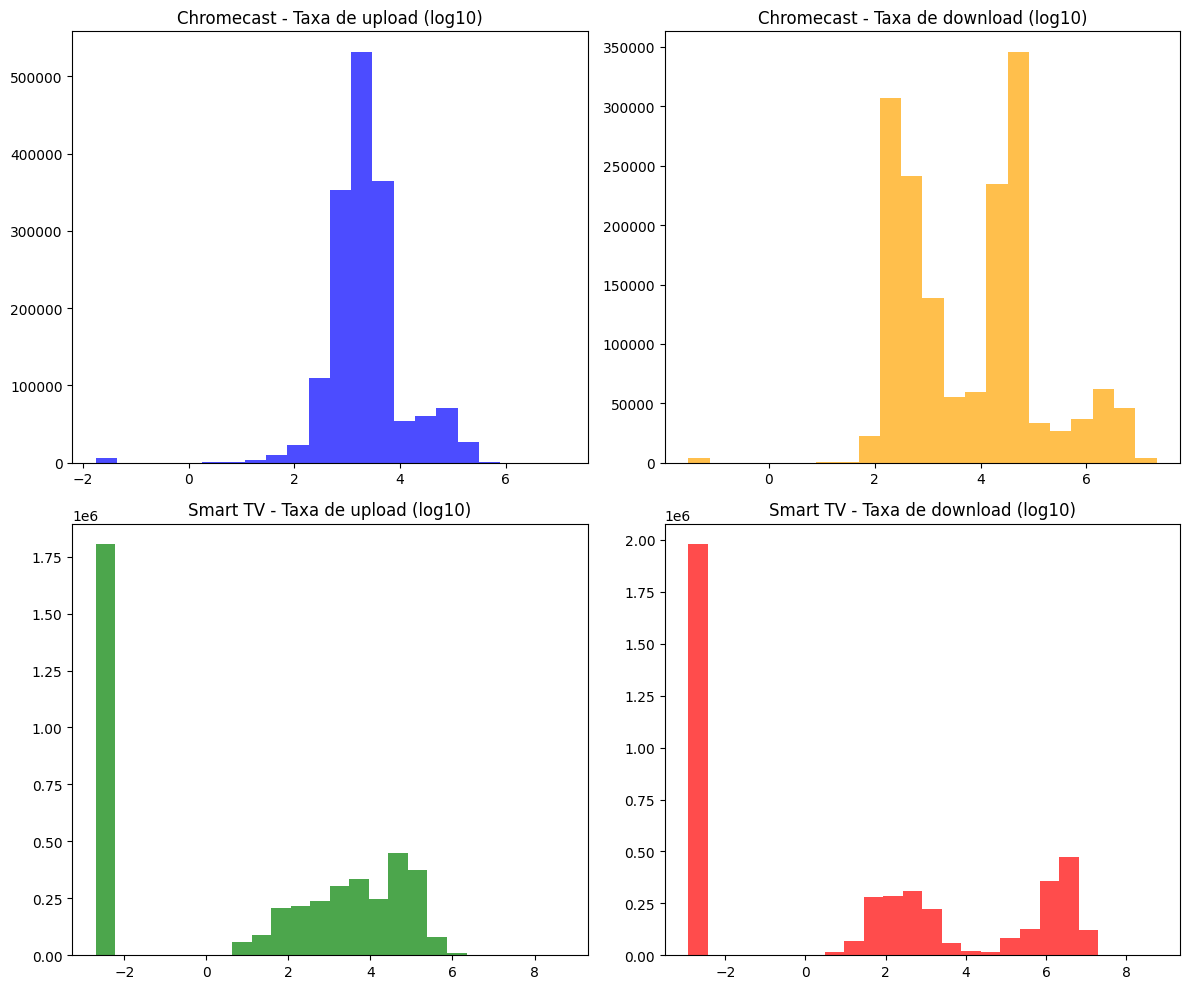

In [8]:
# Criando separações da figura
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Histogramas
axs[0, 0].hist(df_chromecast['bytes_up_log10'], bins='sturges', alpha=0.7, color='blue')
axs[0, 0].set_title('Chromecast - Taxa de upload (log10)')
axs[0, 1].hist(df_chromecast['bytes_down_log10'], bins='sturges', alpha=0.7, color='orange')
axs[0, 1].set_title('Chromecast - Taxa de download (log10)')
axs[1, 0].hist(df_smarttv['bytes_up_log10'], bins='sturges', alpha=0.7, color='green')
axs[1, 0].set_title('Smart TV - Taxa de upload (log10)')
axs[1, 1].hist(df_smarttv['bytes_down_log10'], bins='sturges', alpha=0.7, color='red')
axs[1, 1].set_title('Smart TV - Taxa de download (log10)')

plt.tight_layout()

#### Função distribuição empírica

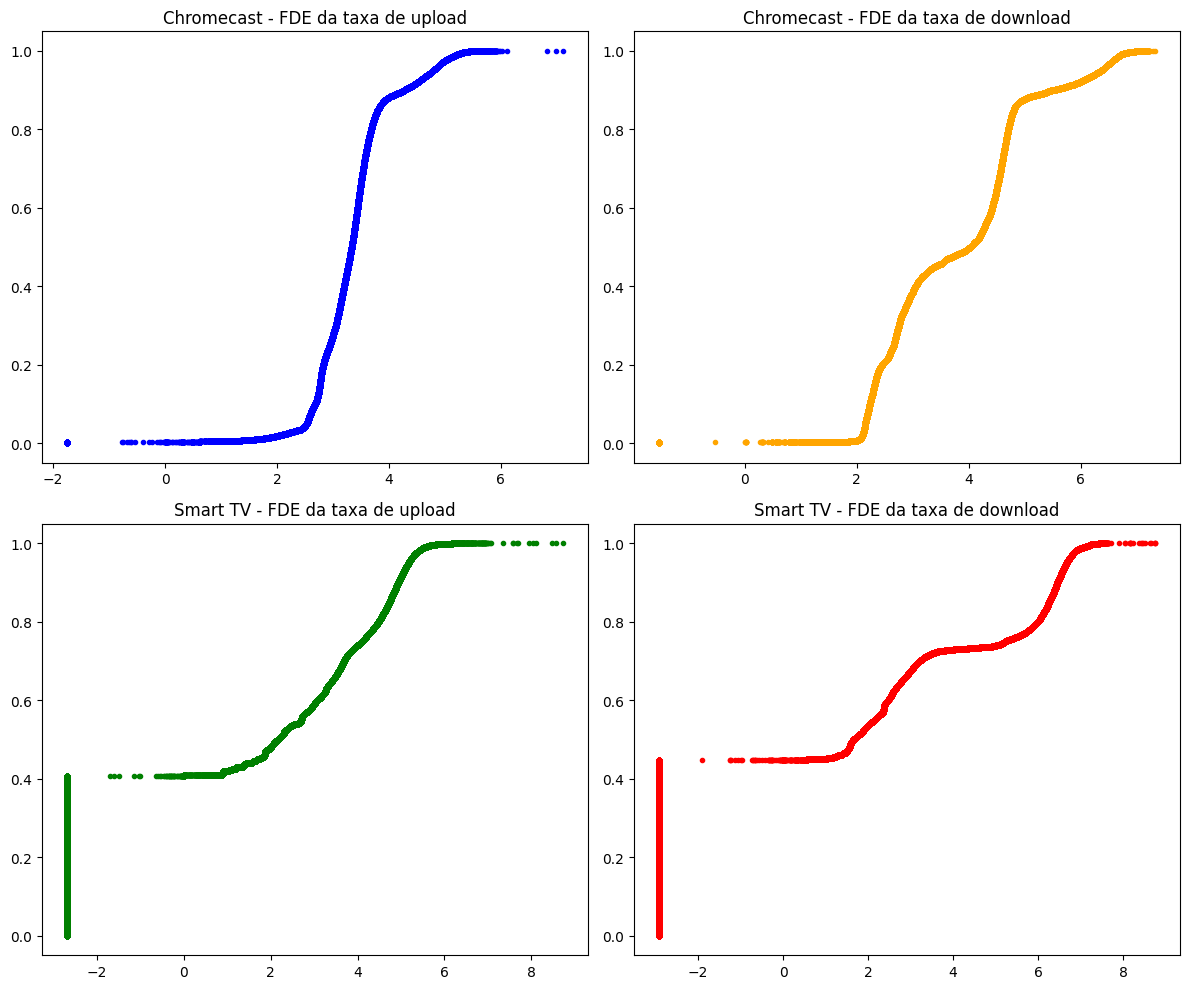

In [9]:
# Função para calcular a FDE
def fde(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n + 1) / n
    return x, y

# Chromecast
x_chromecast_up, y_chromecast_up = fde(df_chromecast['bytes_up_log10'])
x_chromecast_down, y_chromecast_down = fde(df_chromecast['bytes_down_log10'])

# Smart TV
x_smart_tv_up, y_smart_tv_up = fde(df_smarttv['bytes_up_log10'])
x_smart_tv_down, y_smart_tv_down = fde(df_smarttv['bytes_down_log10'])

# Criando subplots para a FDE
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plots
axs[0, 0].plot(x_chromecast_up, y_chromecast_up, marker='.', linestyle='none', color='blue')
axs[0, 0].set_title('Chromecast - FDE da taxa de upload')
axs[0, 1].plot(x_chromecast_down, y_chromecast_down, marker='.', linestyle='none', color='orange')
axs[0, 1].set_title('Chromecast - FDE da taxa de download')
axs[1, 0].plot(x_smart_tv_up, y_smart_tv_up, marker='.', linestyle='none', color='green')
axs[1, 0].set_title('Smart TV - FDE da taxa de upload')
axs[1, 1].plot(x_smart_tv_down, y_smart_tv_down, marker='.', linestyle='none', color='red')
axs[1, 1].set_title('Smart TV - FDE da taxa de download')

plt.tight_layout()

#### Box Plots

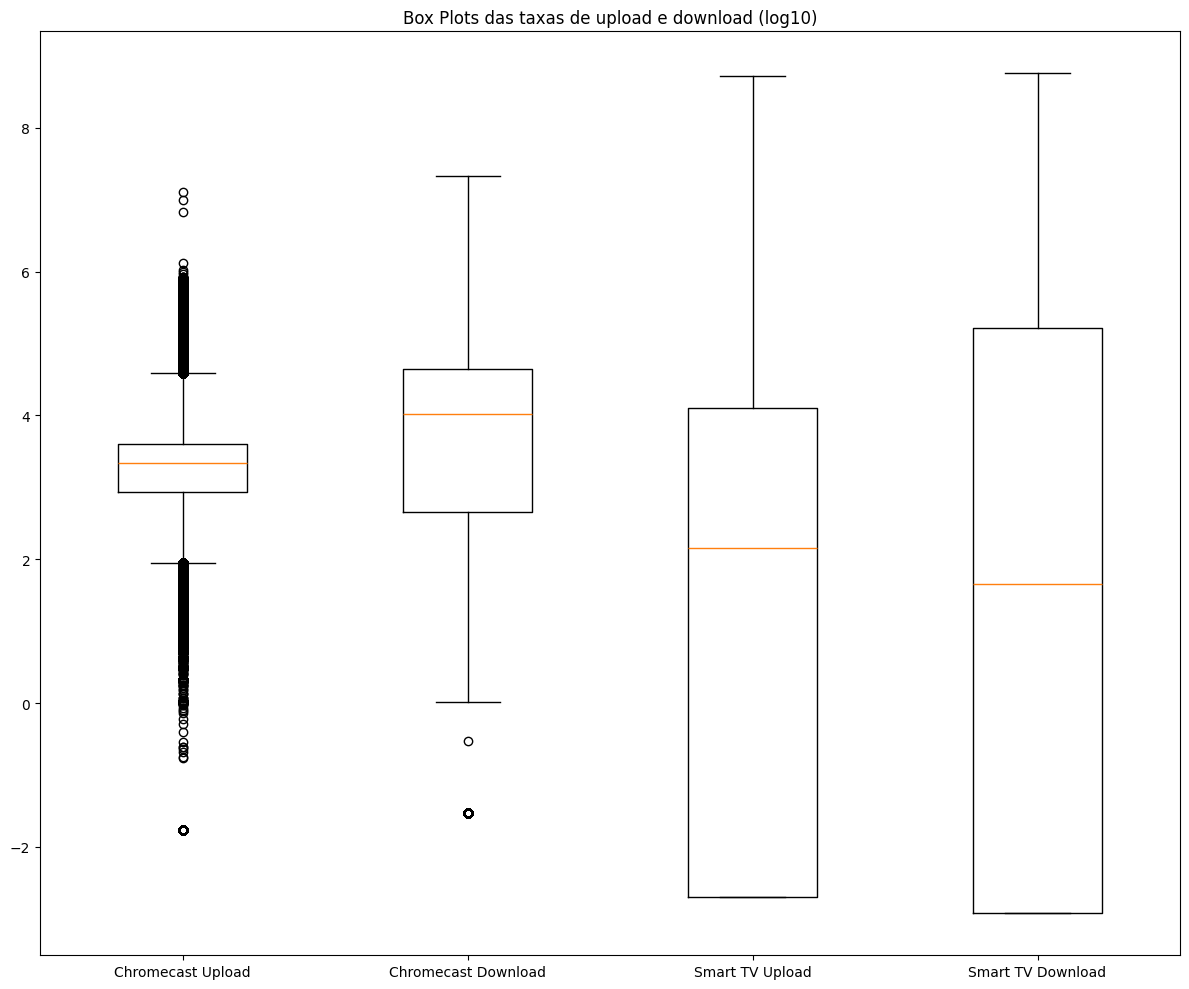

In [10]:
# Montando os Box Plots
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111)
ax.boxplot([df_chromecast['bytes_up_log10'], df_chromecast['bytes_down_log10'], df_smarttv['bytes_up_log10'], df_smarttv['bytes_down_log10']], 
               labels=['Chromecast Upload', 'Chromecast Download', 'Smart TV Upload', 'Smart TV Download'])
ax.set_title('Box Plots das taxas de upload e download (log10)')

plt.tight_layout()


#### Estatísticas (média, variância e desvio padrão)

In [11]:
# Calculando as estatísticas (média, variância e desvio padrão) para cada coluna
chromecast_stats_up = [np.mean(df_chromecast['bytes_up_log10']), np.var(df_chromecast['bytes_up_log10']),
                      np.std(df_chromecast['bytes_up_log10'])]
chromecast_stats_down = [np.mean(df_chromecast['bytes_down_log10']), np.var(df_chromecast['bytes_down_log10']),
                        np.std(df_chromecast['bytes_down_log10'])]

smart_tv_stats_up = [np.mean(df_smarttv['bytes_up_log10']), np.var(df_smarttv['bytes_up_log10']),
                    np.std(df_smarttv['bytes_up_log10'])]
smart_tv_stats_down = [np.mean(df_smarttv['bytes_down_log10']), np.var(df_smarttv['bytes_down_log10']),
                      np.std(df_smarttv['bytes_down_log10'])]

# Print calculated statistics
print("Chromecast - Estatísticas para taxa de upload (log10):\n - Média = ", chromecast_stats_up[0], 
      "\n - Variância = ", chromecast_stats_up[1], "\n - Desvio padrão = ", chromecast_stats_up[2])
print("Chromecast - Estatísticas para taxa de download (log10):\n - Média = ", chromecast_stats_down[0], 
      "\n - Variância = ", chromecast_stats_down[1], "\n - Desvio padrão = ", chromecast_stats_down[2])
print("Smart TV - Estatísticas para taxa de upload (log10):\n - Média = ", smart_tv_stats_up[0], 
      "\n - Variância = ", smart_tv_stats_up[1], "\n - Desvio padrão = ", smart_tv_stats_up[2])
print("Smart TV - Estatísticas para taxa de download (log10):\n - Média = ", smart_tv_stats_down[0], 
      "\n - Variância = ", smart_tv_stats_down[1], "\n - Desvio padrão = ", smart_tv_stats_down[2])

Chromecast - Estatísticas para taxa de upload (log10):
 - Média =  3.34308631091325 
 - Variância =  0.517277337886133 
 - Desvio padrão =  0.719219950978929
Chromecast - Estatísticas para taxa de download (log10):
 - Média =  3.7954787766229656 
 - Variância =  1.7011502790548356 
 - Desvio padrão =  1.3042815183290897
Smart TV - Estatísticas para taxa de upload (log10):
 - Média =  1.0545533293386347 
 - Variância =  10.62633460224527 
 - Desvio padrão =  3.2598059148123024
Smart TV - Estatísticas para taxa de download (log10):
 - Média =  1.0415747226804573 
 - Variância =  14.986444953944806 
 - Desvio padrão =  3.871233001763754


### Seção 3 - Estatísticas por horário

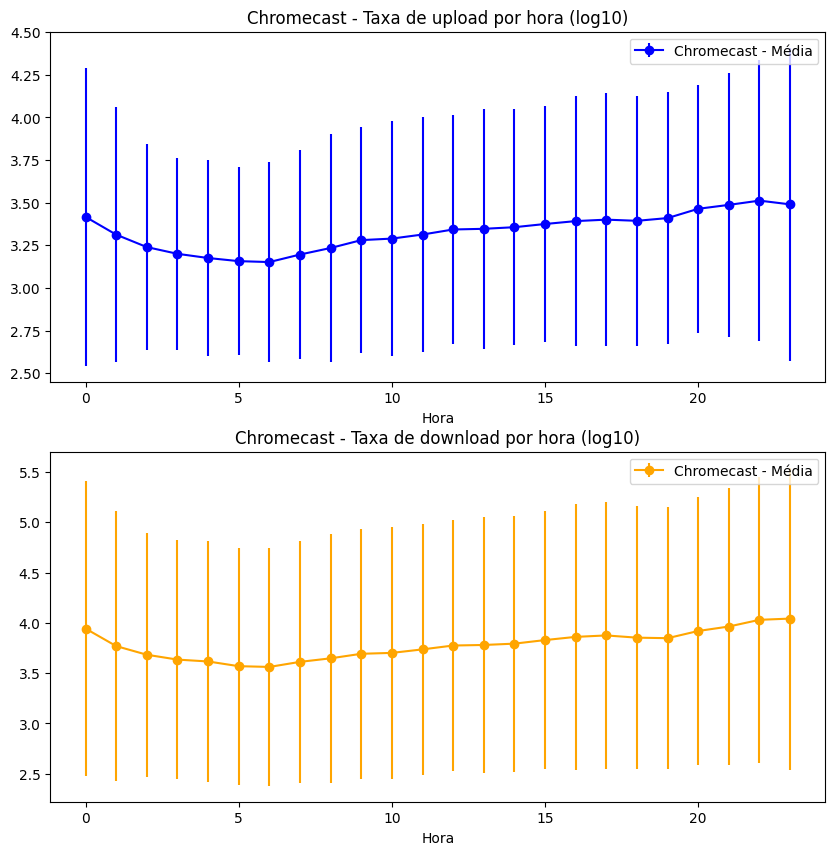

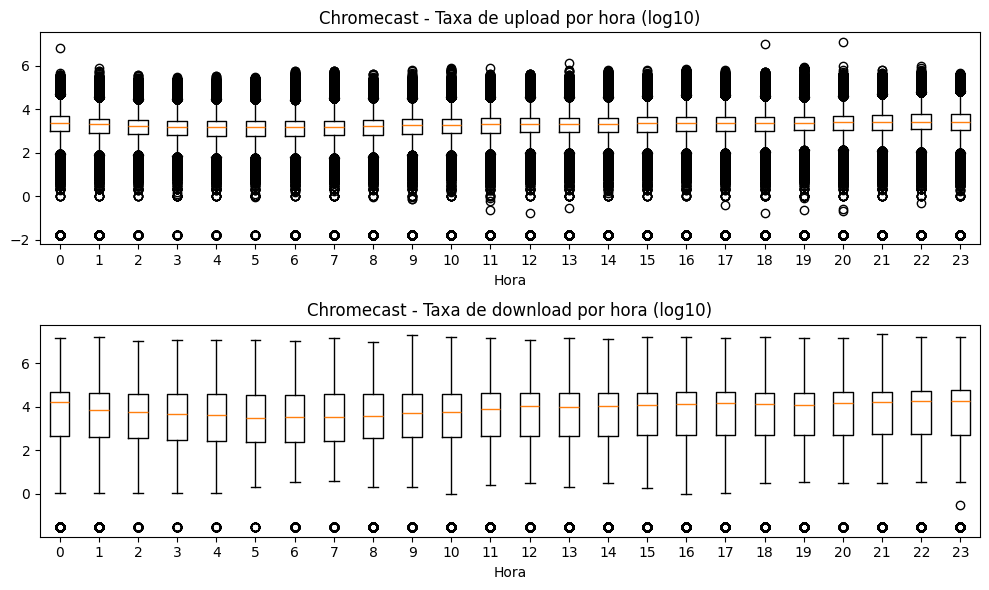

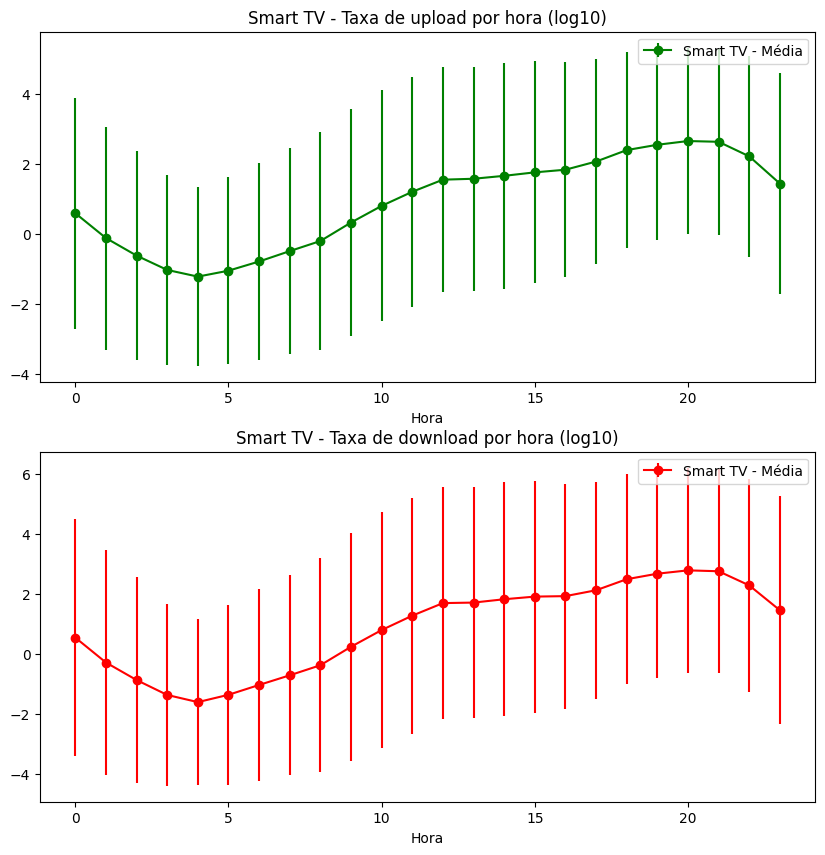

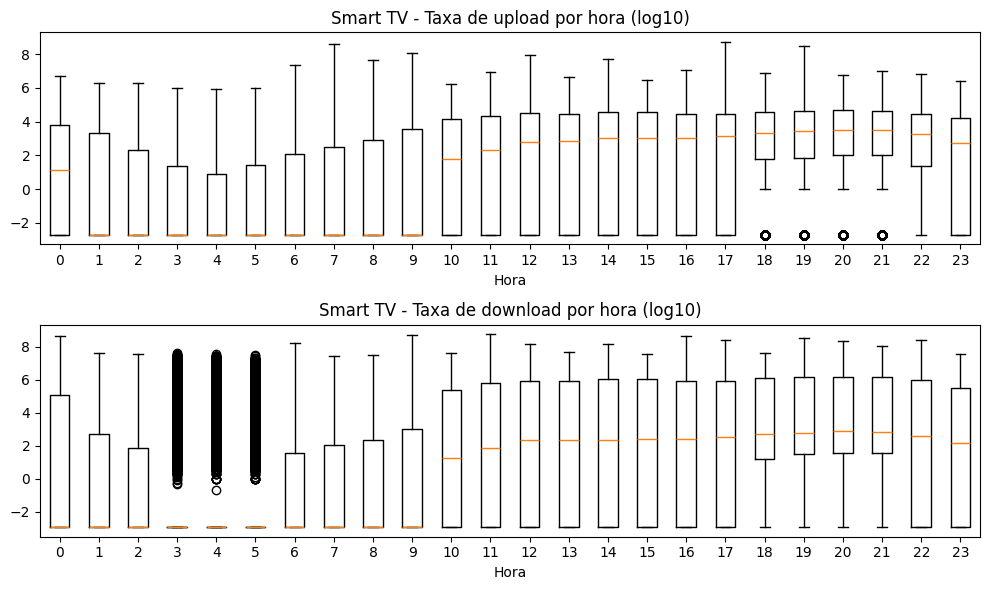

In [12]:
# Função para calcular as estatísticas por hora
def calculate_statistics_by_hour(dataframe, device_type):
    # Agrupar por hora
    grouped = dataframe.groupby(dataframe['date_hour'].dt.hour)

    # Inicializar listas para armazenar valores de média, variância, desvio padrão e os dados para o
    # box plot
    upload_means, download_means = [], []
    upload_variances, download_variances = [], []
    upload_std_devs, download_std_devs = [], []
    upload_boxplot_data, download_boxplot_data = [], []

    for hour, group in grouped:
        # Calcular estatísticas
        upload_mean = np.mean(group['bytes_up_log10'])
        download_mean = np.mean(group['bytes_down_log10'])
        upload_variance = np.var(group['bytes_up_log10'])
        download_variance = np.var(group['bytes_down_log10'])
        upload_std_dev = np.std(group['bytes_up_log10'])
        download_std_dev = np.std(group['bytes_down_log10'])

        # Adicionar dados às listas
        upload_means.append(upload_mean)
        download_means.append(download_mean)
        upload_variances.append(upload_variance)
        download_variances.append(download_variance)
        upload_std_devs.append(upload_std_dev)
        download_std_devs.append(download_std_dev)
        upload_boxplot_data.append(group['bytes_up_log10'])
        download_boxplot_data.append(group['bytes_down_log10'])

    # Criando subplots para as estatísticas
    fig, axs = plt.subplots(2, 1, figsize=(10, 10)) # azul laranja verde vermelho

    # Estatísticas (colocar média como marker e desvio padrão como barra de erro)
    colors = ["blue", "lightblue", "darkblue"] if device_type == "Chromecast" else ["green", "#00ff00", "#009933"]
    axs[0].errorbar(grouped['date_hour'].first().index, upload_means, yerr=upload_std_devs, marker='o', linestyle='-', color=colors[0], label=f'{device_type} - Média')
    axs[0].set_title(f'{device_type} - Taxa de upload por hora (log10)')
    axs[0].set_xlabel('Hora')
    axs[0].legend()

    colors = ["orange", "#ffcc00", "#996600"] if device_type == "Chromecast" else ["red", "#ff5050", "#990000"]
    axs[1].errorbar(grouped['date_hour'].first().index, download_means, yerr=download_std_devs, marker='o', linestyle='-', color=colors[0], label=f'{device_type} - Média')
    axs[1].set_title(f'{device_type} - Taxa de download por hora (log10)')
    axs[1].set_xlabel('Hora')
    axs[1].legend()

    # Box plots
    fig, axs = plt.subplots(2, 1, figsize=(10, 6)) # azul laranja verde vermelho
    axs[0].boxplot(upload_boxplot_data, labels=grouped['date_hour'].first().index)
    axs[0].set_title(f'{device_type} - Taxa de upload por hora (log10)')
    axs[0].set_xlabel('Hora')

    axs[1].boxplot(download_boxplot_data, labels=grouped['date_hour'].first().index)
    axs[1].set_title(f'{device_type} - Taxa de download por hora (log10)')
    axs[1].set_xlabel('Hora')


    plt.tight_layout()
    plt.show()

# Perform calculations for Chromecast and Smart TV
calculate_statistics_by_hour(df_chromecast, 'Chromecast')
calculate_statistics_by_hour(df_smarttv, 'Smart TV')

### Seção 4 - Caracterizando os horários com maior valor de tráfego

#### Passo 1 - Identificar os horários com maior valor de tráfego

In [13]:
def get_peak_hours(dataframe):
    # Agrupar por hora e calcular média
    grouped = dataframe.groupby(dataframe['date_hour'].dt.hour)
    mean_by_hour = grouped[['bytes_up_log10', 'bytes_down_log10']].mean()

    # Obter hora de pico para upload e download
    peak_upload_hour = mean_by_hour['bytes_up_log10'].idxmax()
    peak_download_hour = mean_by_hour['bytes_down_log10'].idxmax()

    return peak_upload_hour, peak_download_hour

# Obter hora de pico para upload e download
chromecast_peak_upload, chromecast_peak_download = get_peak_hours(df_chromecast)
smarttv_peak_upload, smarttv_peak_download = get_peak_hours(df_smarttv)

print("Chromecast - Hora de pico para upload: ", chromecast_peak_upload)
print("Chromecast - Hora de pico para download: ", chromecast_peak_download)
print("Smart TV - Hora de pico para upload: ", smarttv_peak_upload)
print("Smart TV - Hora de pico para download: ", smarttv_peak_download)

Chromecast - Hora de pico para upload:  22
Chromecast - Hora de pico para download:  23
Smart TV - Hora de pico para upload:  20
Smart TV - Hora de pico para download:  20


#### Passo 2 - Histogramas

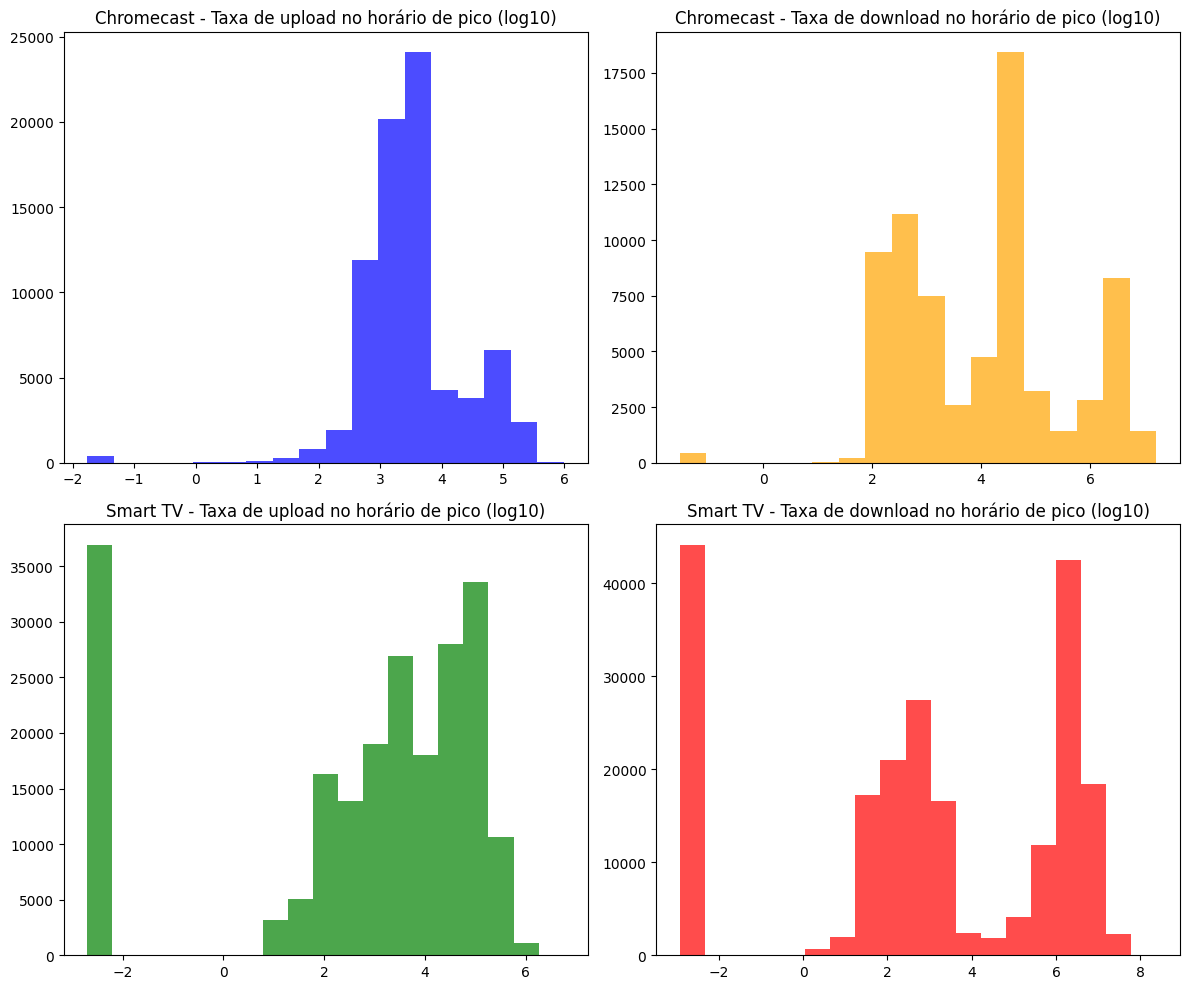

In [14]:
# Filtrar dados para as horas de pico
chromecast_peak_upload_data = df_chromecast[df_chromecast['date_hour'].dt.hour == chromecast_peak_upload]
chromecast_peak_download_data = df_chromecast[df_chromecast['date_hour'].dt.hour == chromecast_peak_download]
smarttv_peak_upload_data = df_smarttv[df_smarttv['date_hour'].dt.hour == smarttv_peak_upload]
smarttv_peak_download_data = df_smarttv[df_smarttv['date_hour'].dt.hour == smarttv_peak_download]

# Montar histogramas
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[0, 0].hist(chromecast_peak_upload_data['bytes_up_log10'], bins='sturges', alpha=0.7, color='blue')
axs[0, 0].set_title('Chromecast - Taxa de upload no horário de pico (log10)')
axs[0, 1].hist(chromecast_peak_download_data['bytes_down_log10'], bins='sturges', alpha=0.7, color='orange')
axs[0, 1].set_title('Chromecast - Taxa de download no horário de pico (log10)')
axs[1, 0].hist(smarttv_peak_upload_data['bytes_up_log10'], bins='sturges', alpha=0.7, color='green')
axs[1, 0].set_title('Smart TV - Taxa de upload no horário de pico (log10)')
axs[1, 1].hist(smarttv_peak_download_data['bytes_down_log10'], bins='sturges', alpha=0.7, color='red')
axs[1, 1].set_title('Smart TV - Taxa de download no horário de pico (log10)')

plt.tight_layout()

#### Passo 3 - QQ Plot

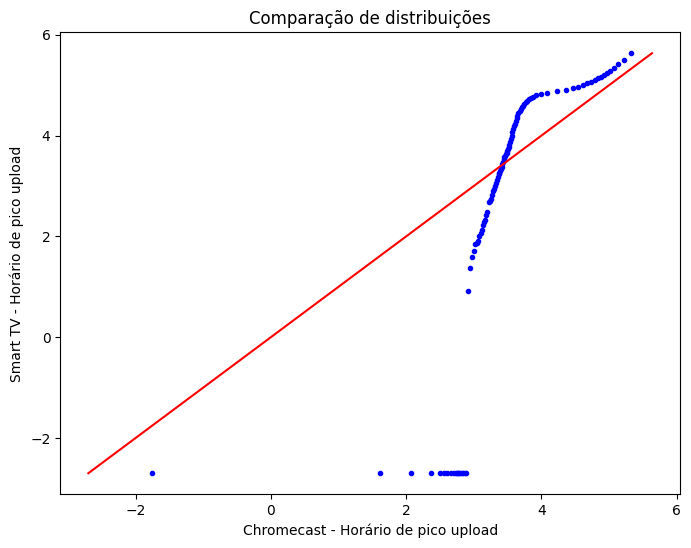

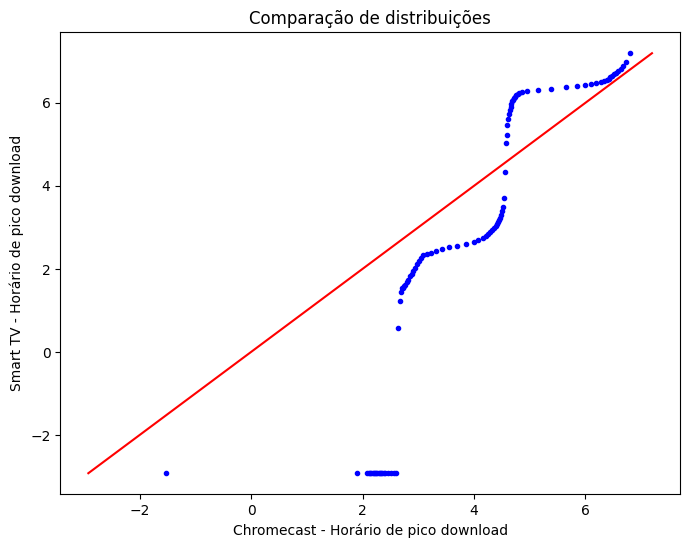

In [15]:
# Função para comparar distribuições
def qq_plot(data1, data2, label1, label2):
    plt.figure(figsize=(8, 6))

    quantiles1 = np.quantile(data1, np.arange(0, 1, 0.01))
    quantiles2 = np.quantile(data2, np.arange(0, 1, 0.01))

    plt.plot(quantiles1, quantiles2, marker='.', linestyle='none', color='blue')
    plt.plot([np.min((quantiles1.min(), quantiles2.min())), np.max((quantiles1.max(), quantiles2.max()))],
             [np.min((quantiles1.min(), quantiles2.min())), np.max((quantiles1.max(), quantiles2.max()))],
             linestyle='-', color='red')

    plt.title('Comparação de distribuições')
    plt.xlabel(label1)
    plt.ylabel(label2)
    plt.show()

qq_plot(chromecast_peak_upload_data['bytes_up_log10'], smarttv_peak_upload_data['bytes_up_log10'],
                   'Chromecast - Horário de pico upload', 'Smart TV - Horário de pico upload')
qq_plot(chromecast_peak_download_data['bytes_down_log10'], smarttv_peak_download_data['bytes_down_log10'],
                     'Chromecast - Horário de pico download', 'Smart TV - Horário de pico download')

### Seção 5 - Análise de correlação

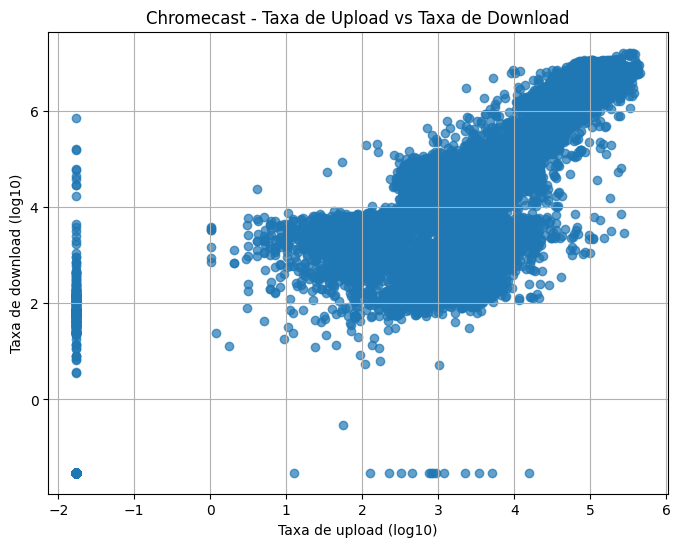

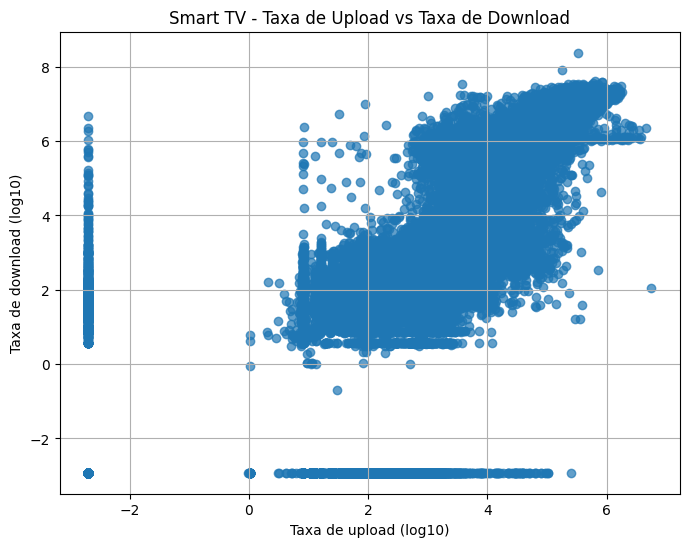

Chromecast - Coeficiente de correlação:  0.7791542846112808
Smart TV - Coeficiente de correlação:  0.9050720519252451


In [16]:
# Calculando coeficiente de correlação 
chromecast_corr = chromecast_peak_download_data['bytes_up_log10'].corr(chromecast_peak_download_data['bytes_down_log10'])
smarttv_corr = smarttv_peak_download_data['bytes_up_log10'].corr(smarttv_peak_download_data['bytes_down_log10'])

# Função para exibir scatter plots
def generate_scatter_plot(dataframe, device_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(dataframe['bytes_up_log10'], dataframe['bytes_down_log10'], alpha=0.7)
    plt.title(f'{device_name} - Taxa de Upload vs Taxa de Download')
    plt.xlabel('Taxa de upload (log10)')
    plt.ylabel('Taxa de download (log10)')
    plt.grid(True)
    plt.show()

generate_scatter_plot(chromecast_peak_download_data, 'Chromecast')
generate_scatter_plot(smarttv_peak_download_data, 'Smart TV')

# Exibindo coeficientes de correlação
print("Chromecast - Coeficiente de correlação: ", chromecast_corr)
print("Smart TV - Coeficiente de correlação: ", smarttv_corr)